In [1]:
import numpy as np
import seaborn as sns


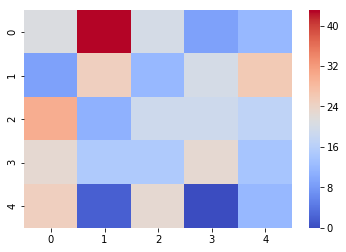

In [2]:
acid_concentration = [21,43,20,9,12,9,25,12,20,26,30,11,19,19,17,23,15,15,23,14,25,2,23,0,12]

acid_conc_arr = np.asarray(acid_concentration)

acid_conc_arr = np.reshape(acid_conc_arr, (5,5))

heatmap = sns.heatmap(acid_conc_arr, cmap="coolwarm")

In [4]:
from scipy.spatial import distance
import itertools


coords = np.asarray(list(itertools.product(range(5), range(5))))

pairs = np.asarray(list(itertools.permutations(coords, 2)))

dist_arr = distance.cdist(coords, coords)


In [15]:
np.where(dist_arr == 2)

(array([ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,
         7,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13,
        13, 14, 14, 14, 15, 15, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20,
        21, 21, 22, 22, 22, 23, 23, 24, 24], dtype=int64),
 array([ 2, 10,  3, 11,  0,  4, 12,  1, 13,  2, 14,  7, 15,  8, 16,  5,  9,
        17,  6, 18,  7, 19,  0, 12, 20,  1, 13, 21,  2, 10, 14, 22,  3, 11,
        23,  4, 12, 24,  5, 17,  6, 18,  7, 15, 19,  8, 16,  9, 17, 10, 22,
        11, 23, 12, 20, 24, 13, 21, 14, 22], dtype=int64))

In [16]:
len(np.where(dist_arr == 2)[0])

60

In [21]:
acid_conc_arr[0,0]

21

In [25]:
diffs = [(acid_conc_arr[coords[a][0], coords[a][1]], acid_conc_arr[coords[b][0], coords[b][1]]) for (a,b) in zip(*np.where(dist_arr == 2))]

In [28]:
lag_results = []

for lag in range(1,4):
    diffs = [(acid_conc_arr[coords[a][0], coords[a][1]], acid_conc_arr[coords[b][0], coords[b][1]]) for (a,b) in zip(*np.where(dist_arr == lag))]
    lag_results.append(sum([(a[0] - a[1])**2 for a in diffs])/(2*len(diffs)))

In [29]:
lag_results

[80.525, 68.25, 115.625]

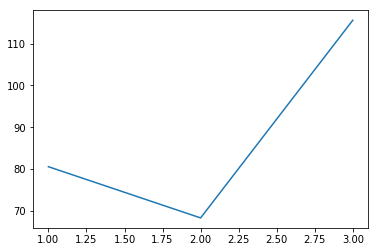

In [31]:
sns.lineplot(x = range(1,4), y=lag_results)